In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from IPython.display import Image
from IPython.core.display import HTML
from params import *
from fault_tree import *
from genetic_operators import *
from nsga2 import *

In [5]:
bayes = pd.read_csv('../results/res_bayes/pareto_front.csv', index_col=0)

In [6]:
bayes.head()

,fitness1,fitness2,rank,genes
0,0.594145,72,1,"[2, 2, 1, 3, 2, 1, 0, 2, 0]"
1,0.345101,113,1,"[1, 2, 1, 3, 3, 1, 3, 1, 3]"
2,0.174849,137,1,"[1, 1, 1, 2, 2, 1, 0, 1, 3]"
4,0.550484,75,1,"[2, 2, 1, 2, 2, 1, 0, 2, 0]"
5,1.900019,22,1,"[3, 2, 0, 3, 3, 3, 3, 2, 3]"


In [35]:
num_of_solutions_with_0 = 0
for genotype in bayes.genes:
    if '0' in genotype:
        num_of_solutions_with_0 += 1

print('Proportion of solutions with 0: {}'.format(num_of_solutions_with_0/len(bayes)))
print('Number of solutions with 0: {}'.format(num_of_solutions_with_0))

Proportion of solutions with 0: 0.819672131147541
Number of solutions with 0: 50


In [15]:
naive = pd.read_csv('../results/res_naive/pareto_front.csv', index_col=0)

In [36]:
num_of_solutions_with_0 = 0
for genotype in naive.genes:
    if '0' in genotype:
        num_of_solutions_with_0 += 1

print('Proportion of solutions with 0: {}'.format(num_of_solutions_with_0/len(naive.genes)))
print('Number of solutions with 0: {}'.format(num_of_solutions_with_0))

Proportion of solutions with 0: 0.9428571428571428
Number of solutions with 0: 66


Text(0.5, 1.0, 'Number of sensors in the solutions, Bayes')

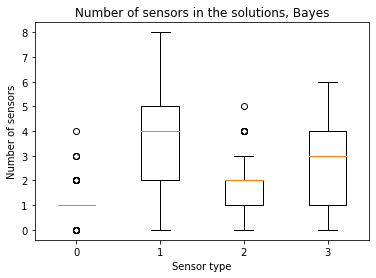

In [76]:
number_of_sensors_0 = []
number_of_sensors_1 = []
number_of_sensors_2 = []
number_of_sensors_3 = []

for genotype in bayes.genes:
    number_of_sensors_0.append(genotype.count('0'))
    number_of_sensors_1.append(genotype.count('1'))
    number_of_sensors_2.append(genotype.count('2'))
    number_of_sensors_3.append(genotype.count('3'))

#box plots
plt.boxplot([number_of_sensors_0, number_of_sensors_1, number_of_sensors_2, number_of_sensors_3])
plt.xticks([1,2,3,4], ['0', '1', '2', '3'])
plt.xlabel('Sensor type')
plt.ylabel('Number of sensors')
plt.title('Number of sensors in the solutions, Bayes')


Text(0.5, 1.0, 'Number of sensors of each type in the solutions, naive')

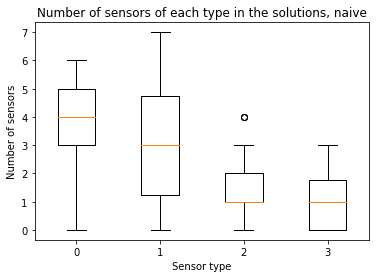

In [77]:
number_of_sensors_0 = []
number_of_sensors_1 = []
number_of_sensors_2 = []
number_of_sensors_3 = []

for genotype in naive.genes:
    number_of_sensors_0.append(genotype.count('0'))
    number_of_sensors_1.append(genotype.count('1'))
    number_of_sensors_2.append(genotype.count('2'))
    number_of_sensors_3.append(genotype.count('3'))


#box plots
plt.boxplot([number_of_sensors_0, number_of_sensors_1, number_of_sensors_2, number_of_sensors_3])
plt.xlabel('Sensor type')
plt.ylabel('Number of sensors')
plt.xticks([1, 2, 3, 4], ['0', '1', '2', '3'])
plt.title('Number of sensors of each type in the solutions, naive')


Text(0.5, 1.0, 'Entropy of solutions containing sensor of type 3')

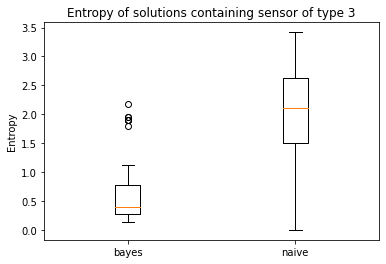

In [68]:
# check the relation between the presence of sensor of type 3 and the fitness1 for each case
# bayes
fitness1_with_3_bayes = []
fitness1_with_3_naive = []

for genotype, fitness1 in zip(bayes.genes, bayes.fitness1):
    if genotype.count('3') > 0:
        fitness1_with_3_bayes.append(fitness1)

for genotype, fitness1 in zip(naive.genes, naive.fitness1):
    if genotype.count('3') > 0:
        fitness1_with_3_naive.append(fitness1)

plt.boxplot([fitness1_with_3_bayes, fitness1_with_3_naive])
plt.xticks([1, 2], ['bayes', 'naive'])
plt.ylabel('Entropy')
plt.title('Entropy of solutions containing sensor of type 3')


Text(0.5, 1.0, 'Number of sensors of type 3 in the pareto front of bayes and naive')

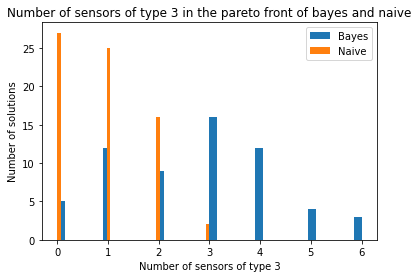

In [70]:
# Compare the number of sensors of type 3 in the pareto front of bayes and naive
# bayes
number_of_sensors_3 = []
for genotype in bayes.genes:
    number_of_sensors_3.append(genotype.count('3'))

plt.hist(number_of_sensors_3, bins=40)

# naive
number_of_sensors_3 = []
for genotype in naive.genes:
    number_of_sensors_3.append(genotype.count('3'))

plt.hist(number_of_sensors_3, bins=40)
plt.legend(['Bayes', 'Naive'])
plt.xlabel('Number of sensors of type 3')
plt.ylabel('Number of solutions')
plt.title('Number of sensors of type 3 in the pareto front of bayes and naive')

Text(0.5, 1.0, 'Entropy of the pareto front of bayes and naive')

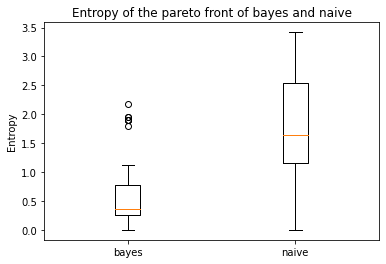

In [79]:
# compare the fitness1 of the pareto front of bayes and naive using box plots
plt.boxplot([bayes.fitness1, naive.fitness1])
plt.xticks([1, 2], ['bayes', 'naive'])
plt.ylabel('Entropy')
plt.title('Entropy of the pareto front of bayes and naive')

Text(0.5, 1.0, 'Total Cost of the pareto front of bayes and naive')

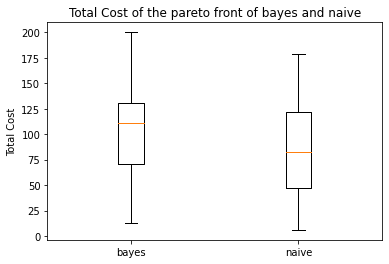

In [78]:
# compare the fitness2 of the pareto front of bayes and naive using box plots
plt.boxplot([bayes.fitness2, naive.fitness2])
plt.xticks([1, 2], ['bayes', 'naive'])
plt.ylabel('Total Cost')
plt.title('Total Cost of the pareto front of bayes and naive')


In [3]:
# open and combine all pareto fronts
bayes = pd.read_csv('pareto_front.csv', index_col=0)
p0 = pd.read_csv('pareto_front_0.csv', index_col=0)
p1 = pd.read_csv('pareto_front_1.csv', index_col=0)
p2 = pd.read_csv('pareto_front_2.csv', index_col=0)
p3 = pd.read_csv('pareto_front_3.csv', index_col=0)
p4 = pd.read_csv('pareto_front_4.csv', index_col=0)
p5 = pd.read_csv('pareto_front_5.csv', index_col=0)
p6 = pd.read_csv('pareto_front_6.csv', index_col=0)
p7 = pd.read_csv('pareto_front_7.csv', index_col=0)
p8 = pd.read_csv('pareto_front_8.csv', index_col=0)
p9 = pd.read_csv('pareto_front_9.csv', index_col=0)

pareto_front = pd.concat([bayes, p0, p1, p2, p3, p4, p5, p6, p7, p8, p9])


In [4]:
pareto_front.head()

,fitness1,fitness2,rank,genes
0,0.594145,72,1,"[2, 2, 1, 3, 2, 1, 0, 2, 0]"
1,0.345101,113,1,"[1, 2, 1, 3, 3, 1, 3, 1, 3]"
2,0.174849,137,1,"[1, 1, 1, 2, 2, 1, 0, 1, 3]"
4,0.550484,75,1,"[2, 2, 1, 2, 2, 1, 0, 2, 0]"
5,1.900019,22,1,"[3, 2, 0, 3, 3, 3, 3, 2, 3]"


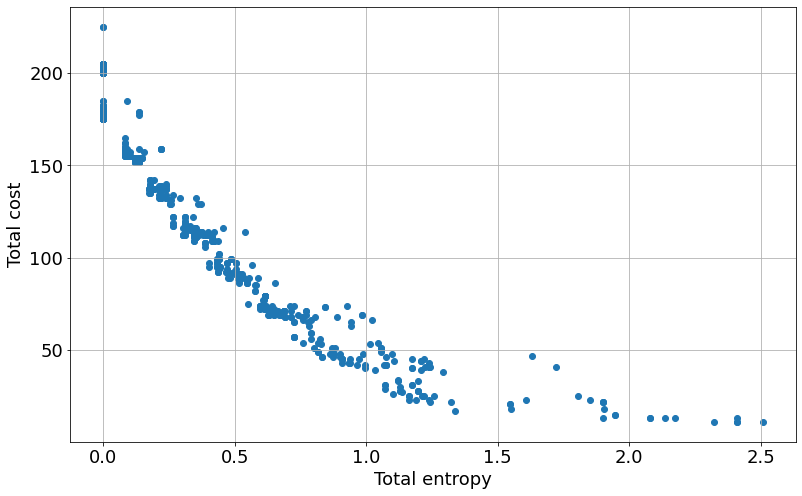

In [6]:
#plot the pareto front
plt.figure(figsize=(13, 8))
plt.rcParams.update({'font.size': 18})
# add grid line
plt.grid(True)
plt.xlabel('Total entropy')
plt.ylabel('Total cost')
plt.scatter(pareto_front.fitness1, pareto_front.fitness2)
plt.savefig('all_fronts.png')

In [7]:
def filter_dominant_solutions(pareto_front):
    dominant_solutions = []
    for i, solution in pareto_front.iterrows():
        is_dominant = True
        for j, other_solution in pareto_front.iterrows():
            if i == j:
                continue
            if solution.fitness1 > other_solution.fitness1 and solution.fitness2 > other_solution.fitness2:
                is_dominant = False
                break
        if is_dominant:
            dominant_solutions.append(solution)
    return pd.DataFrame(dominant_solutions)

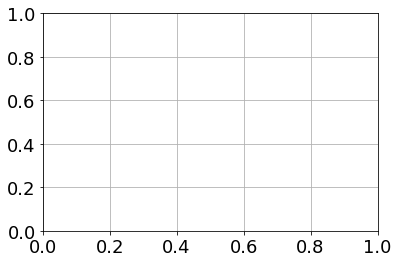

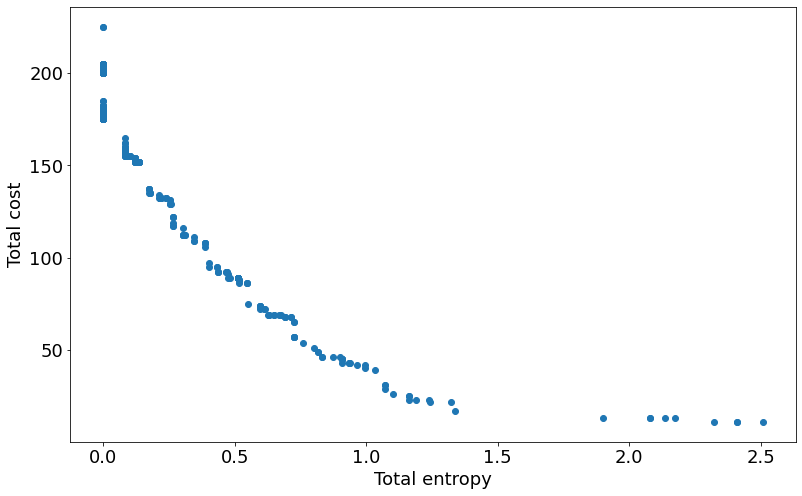

In [8]:
pareto = filter_dominant_solutions(pareto_front)


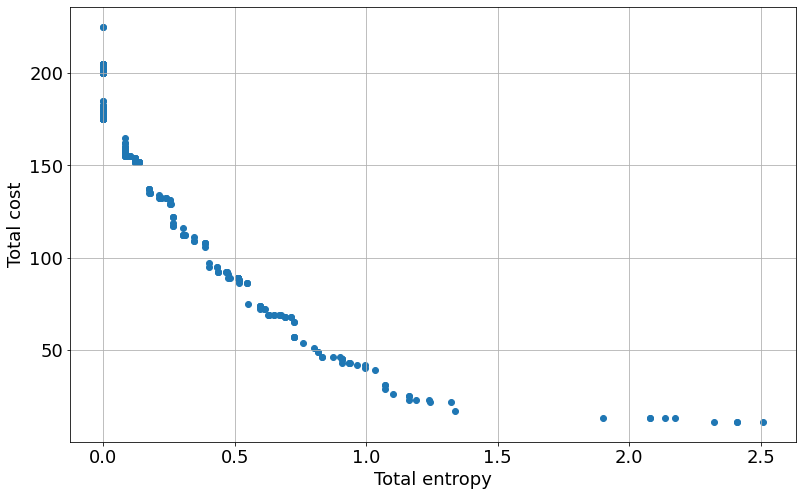

In [9]:
# plot the pareto front
# make sure that the 0 is shown in the plot

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(13, 8))
plt.grid(True)
plt.xlabel('Total entropy')
plt.ylabel('Total cost')
plt.scatter(pareto.fitness1, pareto.fitness2)
plt.savefig('final_front.png')

In [53]:
pareto.to_csv('final_pareto.csv')